<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing Chipotle Data

_Author: Joseph Nelson (DC)_

---

For Project 2, you will complete a series of exercises exploring [order data from Chipotle](https://github.com/TheUpshot/chipotle), compliments of _The New York Times'_ "The Upshot."

For these exercises, you will conduct basic exploratory data analysis (Pandas not required) to understand the essentials of Chipotle's order data: how many orders are being made, the average price per order, how many different ingredients are used, etc. These allow you to practice business analysis skills while also becoming comfortable with Python.

---

## Basic Level

### Part 1: Read in the file with `csv.reader()` and store it in an object called `file_nested_list`.

Hint: This is a TSV (tab-separated value) file, and `csv.reader()` needs to be told [how to handle it](https://docs.python.org/2/library/csv.html).

In [214]:
import csv
from collections import namedtuple   # Convenient to store the data rows

DATA_FILE = './data/chipotle.tsv'

In [215]:
file_nested_list = [] # an empty list to append data to

with open(DATA_FILE) as fd:
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    for row in rd: # loop through the rows (aka lists) in rd
        file_nested_list.append(row)
        
file_nested_list[:5] # look at the first 5 rows

[['order_id', 'quantity', 'item_name', 'choice_description', 'item_price'],
 ['1', '1', 'Chips and Fresh Tomato Salsa', 'NULL', '$2.39 '],
 ['1', '1', 'Izze', '[Clementine]', '$3.39 '],
 ['1', '1', 'Nantucket Nectar', '[Apple]', '$3.39 '],
 ['1', '1', 'Chips and Tomatillo-Green Chili Salsa', 'NULL', '$2.39 ']]

### Part 2: Separate `file_nested_list` into the `header` and the `data`.


In [216]:
header = file_nested_list[0] # create header from first row in file_nested_list
header

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

In [217]:
data = file_nested_list[1:] # create data from every row AFTER the first
data[:5] # show the first 5 rows

[['1', '1', 'Chips and Fresh Tomato Salsa', 'NULL', '$2.39 '],
 ['1', '1', 'Izze', '[Clementine]', '$3.39 '],
 ['1', '1', 'Nantucket Nectar', '[Apple]', '$3.39 '],
 ['1', '1', 'Chips and Tomatillo-Green Chili Salsa', 'NULL', '$2.39 '],
 ['2',
  '2',
  'Chicken Bowl',
  '[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]',
  '$16.98 ']]

---

## Intermediate Level

### Part 3: Calculate the average price of an order.

Hint: Examine the data to see if the `quantity` column is relevant to this calculation.

Hint: Think carefully about the simplest way to do this!

In [218]:
# turn header and data into a dataframe
orders = pd.DataFrame(data, columns=header)

orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NULL,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NULL,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [219]:
# convert quantity to int and item_price to float
orders['quantity'] =  orders['quantity'].astype(int)
orders['item_price'] =  orders['item_price'].map(lambda x: float(x.replace('$','')))

orders.info() # confirm that quantity is now an int and item_price is now a float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null object
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    4622 non-null object
item_price            4622 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.6+ KB


In [220]:
# first create a total_price columm to account for line items with quantity > 1
orders['total_price'] = orders['quantity'] * orders['item_price']

orders['total_price'].head()

0     2.39
1     3.39
2     3.39
3     2.39
4    33.96
Name: total_price, dtype: float64

In [221]:
# calculate avg order cost
avg_order_cost = orders.groupby('order_id')['total_price'].sum().mean()
print('The average order cost ${:.2f}'.format(avg_order_cost))

The average order cost $21.39


### Part 4: Create a list (or set) named `unique_sodas` containing all of unique sodas and soft drinks that Chipotle sells.

Note: Just look for `'Canned Soda'` and `'Canned Soft Drink'`, and ignore other drinks like `'Izze'`.

In [222]:
# find all the rows with a soda purchase, get the choice_description details and only keep unique values
unique_sodas = orders[orders['item_name'].isin(['Canned Soda','Canned Soft Drink'])]['choice_description'].unique()
unique_sodas = [x.replace('[','').replace(']','') for x in unique_sodas] # remove the [] characters

print(unique_sodas)

['Sprite', 'Dr. Pepper', 'Mountain Dew', 'Diet Dr. Pepper', 'Coca Cola', 'Diet Coke', 'Coke', 'Lemonade', 'Nestea']


---

## Advanced Level


### Part 5: Calculate the average number of toppings per burrito.

Note: Let's ignore the `quantity` column to simplify this task.

Hint: Think carefully about the easiest way to count the number of toppings!


In [223]:
burrito_orders = orders[orders['item_name'].str.contains('Burrito')] # find the rows where item_name contains 'Burrito'

burrito_orders.head()

,order_id,quantity,item_name,choice_description,item_price,total_price
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,9.25
16,8,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",8.49,8.49
17,9,1,Chicken Burrito,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.49,8.49
21,11,1,Barbacoa Burrito,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",8.99,8.99


In [224]:
# create a container for the count of toppings per burrito
toppings_count = []

for order in burrito_orders.choice_description: # loop through each burrito order
    toppings_count.append(len(order.split(','))) # split choice_description on every comma, then count the items

avg_toppings = sum(toppings_count)/len(toppings_count) # calculate average # of toppings
print('The average burrito has {:.1f} toppings'.format(avg_toppings))

The average burrito has 5.4 toppings


### Part 6: Create a dictionary. Let the keys represent chip orders and the values represent the total number of orders.

Expected output: `{'Chips and Roasted Chili-Corn Salsa': 18, ... }`

Note: Please take the `quantity` column into account!

Optional: Learn how to use `.defaultdict()` to simplify your code.

In [226]:
from collections import defaultdict

chip_dict = defaultdict(int)

for (name, count) in orders[orders['item_name'].str.contains('Chips')].groupby('item_name')['quantity'].sum().items():
    chip_dict[name] += count

In [227]:
chip_dict

defaultdict(int,
            {'Chips': 230,
             'Chips and Fresh Tomato Salsa': 130,
             'Chips and Guacamole': 506,
             'Chips and Mild Fresh Tomato Salsa': 1,
             'Chips and Roasted Chili Corn Salsa': 23,
             'Chips and Roasted Chili-Corn Salsa': 18,
             'Chips and Tomatillo Green Chili Salsa': 45,
             'Chips and Tomatillo Red Chili Salsa': 50,
             'Chips and Tomatillo-Green Chili Salsa': 33,
             'Chips and Tomatillo-Red Chili Salsa': 25,
             'Side of Chips': 110})

---

## Bonus: Craft a problem statement about this data that interests you, and then answer it!


In [228]:
# what is the relationship between # of items and total cost of an order?
order_summary = orders.groupby('order_id')[['quantity','total_price']].sum()

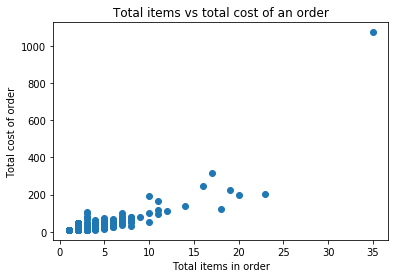

In [229]:
import matplotlib.pyplot as plt

plt.scatter(order_summary.quantity, order_summary.total_price)
plt.title('Total items vs total cost of an order')
plt.xlabel('Total items in order')
plt.ylabel('Total cost of order')
plt.show()

In [230]:
# see the correlation between quanity and total_price (by order)
orders.groupby('order_id')[['quantity','total_price']].sum().corr()

,quantity,total_price
quantity,1.000000,0.778377
total_price,0.778377,1.000000


In [231]:
# check out the order with ~35 items!
big_order_id = order_summary[order_summary.quantity > 30].index[0]

In [232]:
orders[orders.order_id.isin([big_order_id])]

,order_id,quantity,item_name,choice_description,item_price,total_price
3598,1443,15,Chips and Fresh Tomato Salsa,NULL,44.25,663.75
3599,1443,7,Bottled Water,NULL,10.50,73.50
3600,1443,1,6 Pack Soft Drink,[Coke],6.49,6.49
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75,101.25
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00,140.00
3603,1443,3,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",27.75,83.25
3604,1443,2,Bottled Water,NULL,3.00,6.00


In [233]:
# looks like there are some unusual values in the item_price column... $44 for chips + salsa??

In [236]:
orders.sort_values('item_price', ascending=False)[:10] # look at the largest item_price values

,order_id,quantity,item_name,choice_description,item_price,total_price
3598,1443,15,Chips and Fresh Tomato Salsa,NULL,44.25,663.75
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25,105.75
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00,140.00
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00,140.00
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75,101.25
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94,98.82
1255,511,3,Steak Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",27.75,83.25
3603,1443,3,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",27.75,83.25
3636,1454,3,Chicken Burrito,"[Fresh Tomato Salsa, Rice]",26.25,78.75
3634,1454,3,Chicken Burrito,[Fresh Tomato Salsa],26.25,78.75


In [ ]:
# given more time, I might consider excluding some of these records from the analysis